<a href="https://colab.research.google.com/github/mahindragudimetla/Data_Analyst_Projects/blob/main/Australia_Car_Market_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project-5:-Australia Car Market Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("/content/cars_info.csv")

In [4]:
data.shape

(17048, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [6]:
data.describe()

,ID,Price,Year,Kilometers,CC,Seating Capacity
count,1.704800e+04,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,1.279027e+07,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,5.051111e+04,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1.153013e+07,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,1.275715e+07,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,1.280207e+07,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,1.283131e+07,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,1.285246e+07,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


In [7]:
data.isna().sum()

,0
ID,0
Name,0
Price,0
Brand,0
Model,0
Variant,0
Series,0
Year,0
Kilometers,0
Type,0


In [8]:
#1) What is the average price of cars across different brands, and which brands have the highest and lowest average prices?
average_prices = data.groupby('Brand')['Price'].mean()
highest_average_price_brand = average_prices.idxmax()
lowest_average_price_brand = average_prices.idxmin()

print("Average prices of cars across different brands:\n", average_prices)
print("\nBrand with the highest average price:", highest_average_price_brand)
print("Brand with the lowest average price:", lowest_average_price_brand)



Average prices of cars across different brands:
 Brand
Abarth              37493.800000
Alfa Romeo          49282.545455
Aston Martin       235120.000000
Audi                52605.027027
BMW                 56373.000000
Bentley            181405.428571
Chery                8749.500000
Chevrolet          145833.857143
Chrysler            35253.595238
Citroen             24233.384615
Cupra               62334.200000
Dodge               13836.214286
FPV                 91490.000000
Fiat                20448.529412
Ford                36091.152349
Foton               18972.000000
GWM                 38250.793103
Genesis             64888.000000
Great Wall          12300.851852
HSV                 74036.162162
Haval               32565.285714
Hino                46500.000000
Holden              23343.577409
Honda               23326.019370
Hyundai             27240.912603
Infiniti            32747.777778
Isuzu               42962.951311
Iveco               52990.000000
Jaguar              6


Average price of cars by Status:
 Status
Demo            67307.576227
New In Stock    55703.207283
Used            35638.707250
Name: Price, dtype: float64


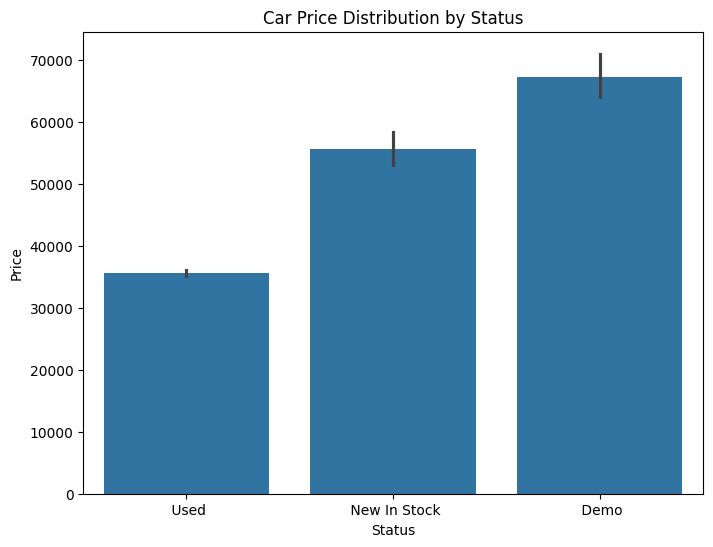

In [10]:
#2) How does the condition of a car (Status) affect its price?
average_price_by_status = data.groupby('Status')['Price'].mean()
print("\nAverage price of cars by Status:\n", average_price_by_status)
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Price', data=data)
plt.title('Car Price Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Price')
plt.show()



Correlation between mileage and price: -0.4474897290060361


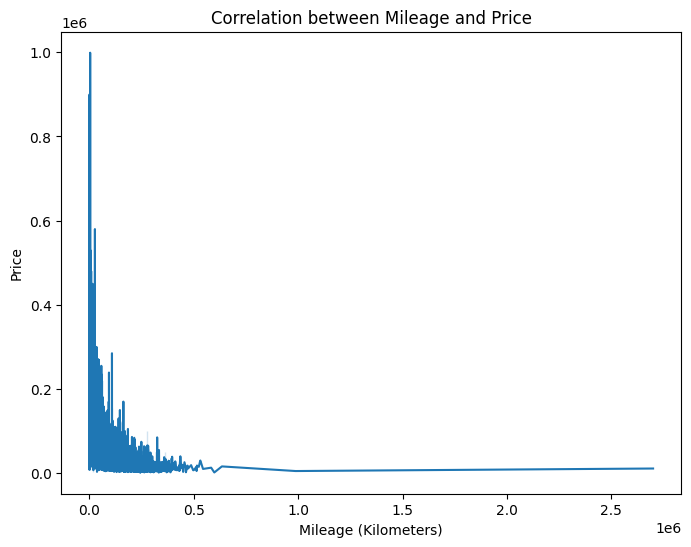

In [14]:
#3) Is there a correlation between mileage (Kilometers) and the price of a car?
correlation = data['Kilometers'].corr(data['Price'])
print("\nCorrelation between mileage and price:", correlation)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Kilometers', y='Price', data=data)
plt.title('Correlation between Mileage and Price')
plt.xlabel('Mileage (Kilometers)')
plt.ylabel('Price')
plt.show()



Correlation between engine capacity and price: 0.29820547470569003
Correlation between engine capacity and mileage: 0.18521906769438357


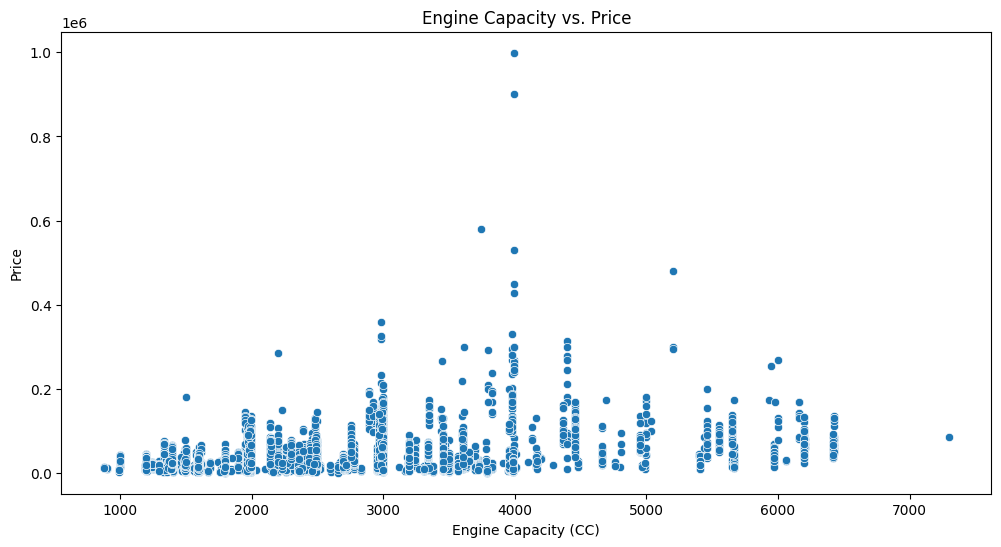

In [17]:
#4) How does engine capacity (CC) relate to car price and mileage?
correlation_cc = data['CC'].corr(data['Price'])
correlation_mileage = data['CC'].corr(data['Kilometers'])
print("\nCorrelation between engine capacity and price:", correlation_cc)
print("Correlation between engine capacity and mileage:", correlation_mileage)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CC', y='Price', data=data)
plt.title('Engine Capacity vs. Price')
plt.xlabel('Engine Capacity (CC)')
plt.ylabel('Price')
plt.show()